## Part 1: Simulation Exercise Instructions ##

In this project you will investigate the exponential distribution in R and compare it with the Central Limit Theorem. The exponential distribution can be simulated in R with rexp(n, lambda) where lambda is the rate parameter. The mean of exponential distribution is 1/lambda and the standard deviation is also 1/lambda. Set lambda = 0.2 for all of the simulations. You will investigate the distribution of averages of 40 exponentials. Note that you will need to do a thousand simulations.

Illustrate via simulation and associated explanatory text the properties of the distribution of the mean of 40 exponentials. You should

*    Show the sample mean and compare it to the theoretical mean of the distribution.
*    Show how variable the sample is (via variance) and compare it to the theoretical variance of the distribution.
*    Show that the distribution is approximately normal.


1.Show the sample mean and compare it to the theoretical mean of the distribution. First I will make a matrix of 40 exponential observed through a 1000 simulations. Then take the mean of those observations. The sample mean is mean2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


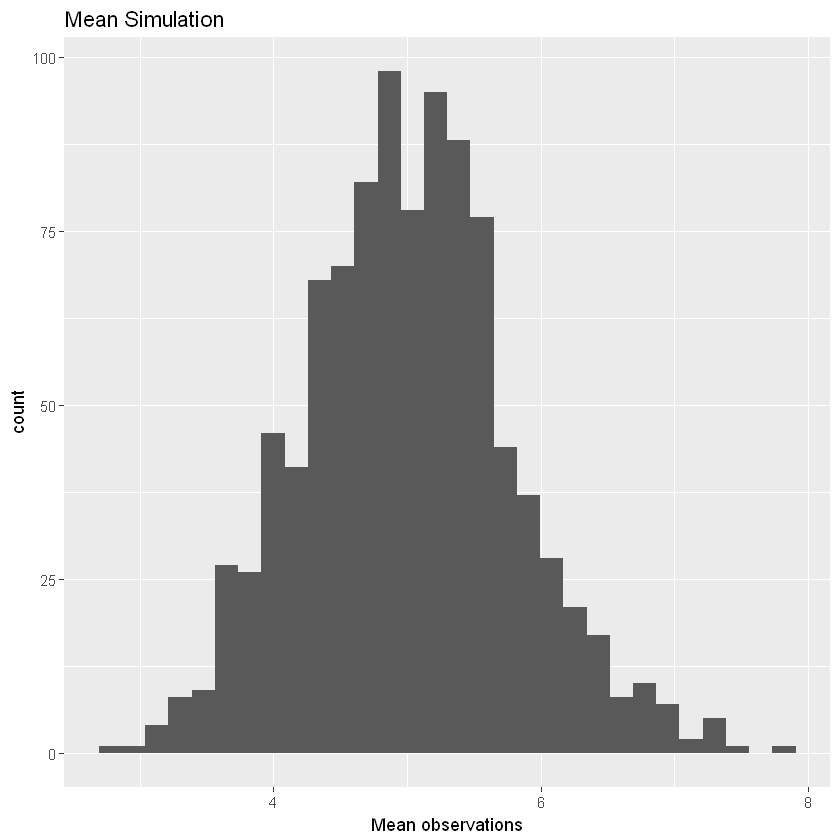

In [11]:
library(ggplot2)
set.seed(12) ## to make this reproducable
n <- 40
lambda <- 0.2
simulation <- replicate(1000, rexp(n, .2))
mean_simulation <- apply(simulation, 2, mean)
qplot(mean_simulation, geom = "histogram", 
      main = "Mean Simulation", 
      xlab = "Mean observations")  


In [2]:
mean2 <- mean(mean_simulation)
print(mean2)

[1] 5.010015


In [3]:
Tmean <- 1/0.2
print(Tmean)

[1] 5


The theoretical mean and sample mean are shown to be very similar.

#### 2. Show how variable the sample is (via variance) and compare it to the theoretical variance of the distribution.####

The expected standard deviation is equal to (1/lambda)/sqrt(n) or Esd. The variance is just the standard deviation squared or Evar

In [8]:
# The expected standard deviation is equal to (1/lambda)/sqrt(n) or Esd. 
# The variance is just the standard deviation squared or Evar
Esd <- (1/.2)/sqrt(n)
Evar <- Esd^2

In [9]:
# We can then calculate the standard deviation and variance of the sample.
Ssd <- sd(mean_simulation)
Svar <- var(mean_simulation)

The standard deviation of the sample is Ssd and the variance of the sample is Svar. These are both close approximations of the expected standard deviation (Esd) and the expected variance (Evar).

#### 3. Show that the distribution is approximately normal.####
Graph shows the simulation means distribution with the normal distribution curve on top. Illustrating that it fits relatively well.

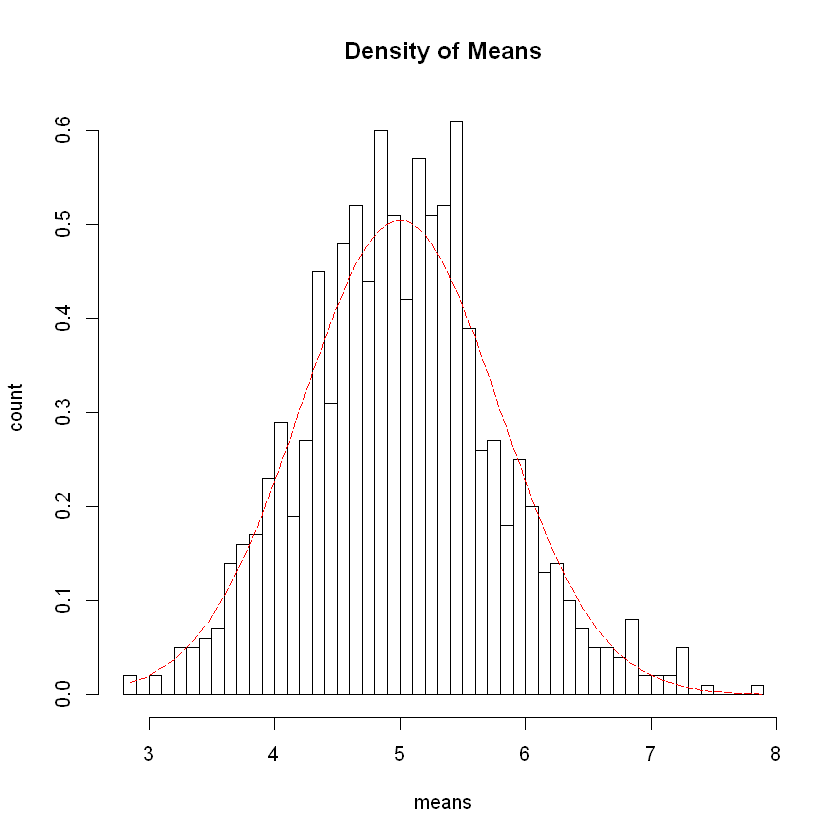

In [10]:
fit <- seq(min(mean_simulation), max(mean_simulation), length=100)
standard_fit <- dnorm(fit, mean=Tmean, sd=Esd)
hist(mean_simulation, breaks = n, prob=T, xlab = "means", ylab = "count", main = "Density of Means")
lines(fit, standard_fit, pch=2, col="red", lty=5)